In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy as np

In [2]:
from tensorflow.keras import datasets,models,layers 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv("D:\\project\\sample_project\\csv files\\fashion-mnist_train.csv")
test_df = pd.read_csv("D:\\project\\sample_project\\csv files\\fashion-mnist_test.csv")

In [4]:
train_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_data = np.array(train_df,dtype = "float32")
test_data = np.array(test_df,dtype = "float32")
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test = test_data[:,1:]/255
y_test = test_data[:,0]

In [6]:
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=0.2,random_state=123)

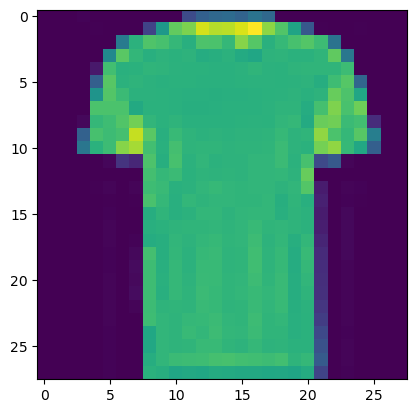

In [7]:
image = x_train[60,:].reshape((28,28))
plt.imshow(image)

In [8]:
!pip install keras

In [23]:
from keras.models import Sequential
from keras.layers import MaxPooling2D,Dense,Flatten,Dropout,Conv2D,Input

In [10]:
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [12]:
im_rows = 28
im_cols = 28

In [13]:
batch_size = 32
im_shape = (im_rows,im_cols,1)

In [15]:
x_train = x_train.reshape(x_train.shape[0],*im_shape)
x_valid = x_valid.reshape(x_valid.shape[0],*im_shape)
x_test = x_test.reshape(x_test.shape[0],*im_shape)

In [25]:
cnn_model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(filters=32, kernel_size=3, activation="relu"),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax")
])

In [27]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

cnn_model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=10,
    verbose=1,
    validation_data=(x_valid, y_valid)
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.7767 - loss: 0.6345 - val_accuracy: 0.8793 - val_loss: 0.3334
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8852 - loss: 0.3213 - val_accuracy: 0.8917 - val_loss: 0.3017
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8993 - loss: 0.2823 - val_accuracy: 0.8965 - val_loss: 0.2869
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9047 - loss: 0.2607 - val_accuracy: 0.8998 - val_loss: 0.2766
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9123 - loss: 0.2391 - val_accuracy: 0.9055 - val_loss: 0.2649
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9200 - loss: 0.2209 - val_accuracy: 0.9056 - val_loss: 0.2640
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9255 - loss: 0.2013 - val_accuracy: 0.9070 - val_loss: 0.2619
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9300 -

In [28]:
score = cnn_model.evaluate(x_test,y_test,verbose = 0)
print(score[0])
print(score[1])

0.2508741319179535
0.9146000146865845


In [33]:
history = cnn_model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=10,
    verbose=1,
    validation_data=(x_valid, y_valid)
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9387 - loss: 0.1658 - val_accuracy: 0.9134 - val_loss: 0.2672
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9411 - loss: 0.1558 - val_accuracy: 0.9110 - val_loss: 0.2686
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9449 - loss: 0.1483 - val_accuracy: 0.9118 - val_loss: 0.2617
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9493 - loss: 0.1394 - val_accuracy: 0.9107 - val_loss: 0.2840
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9486 - loss: 0.1344 - val_accuracy: 0.9037 - val_loss: 0.3093
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9523 - loss: 0.1283 - val_accuracy: 0.9095 - val_loss: 0.2852
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9570 - loss: 0.1206 - val_accuracy: 0.9120 - val_loss: 0.2838
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9557 -

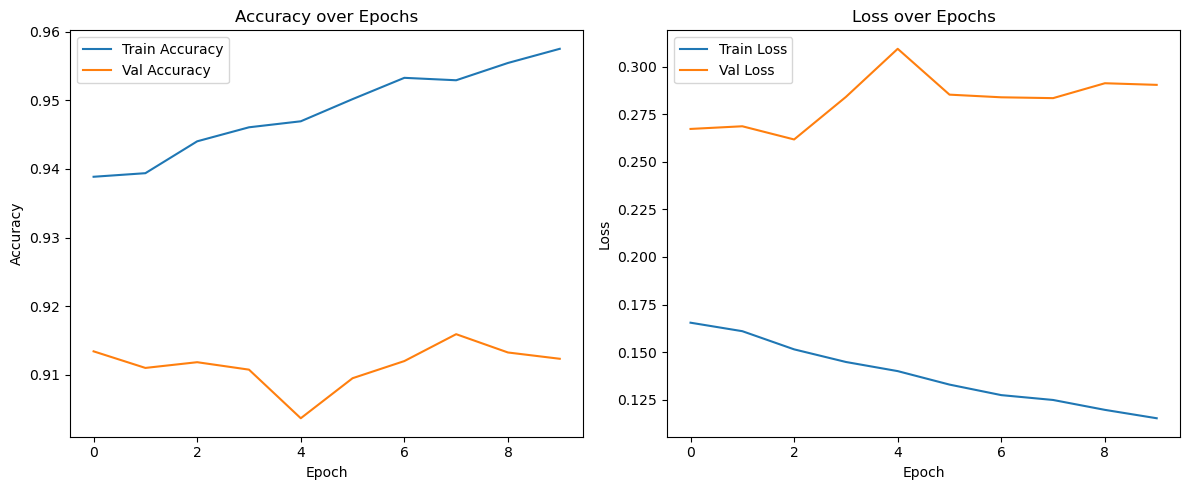

In [34]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


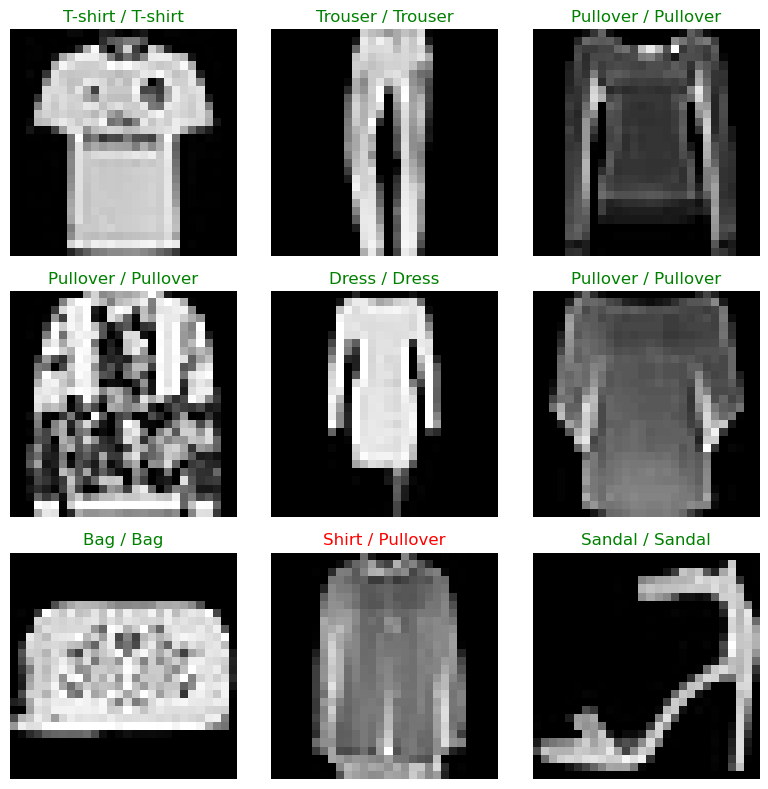

In [37]:
pred = cnn_model.predict(x_test)
labels = np.argmax(pred, axis=1)

names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
         'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    actual = int(y_test[i])
    predicted = labels[i]
    color = 'green' if actual == predicted else 'red'
    plt.title(f"{names[actual]} / {names[predicted]}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [38]:
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 521,216 (1.99 MB)

 Trainable params: 173,738 (678.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 347,478 (1.33 MB)